# 01: Cleaning

Description: Ensuring that the `train` , and `weather` datasets are properly cleaned, and that they're ready for EDA as a combined dataset, along with feature engineering.

*To Note: Spray data was also included within the datasets we were given, however, we decided to opt-out from using it during our modeling process. You'll find the exploration of that dataset within `01a_Cleaning_spray.ibynb`*

## Table of Contents

1. [Examining Train Data](#1)
2. [Examining Test Data](#2)
3. [Examining Weather Data](#3)
4. [Merging Weather + Train Data](#4)


In [44]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

<a name="1"></a>
## 1. Examining `train` Data

In [2]:
df = pd.read_csv('../data/train.csv', parse_dates=['Date'])
df_t = pd.read_csv('../data/test.csv', parse_dates=['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 985.0+ KB


In [4]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


There are zero null values present, as well as zero features that need to be cast as either `float` or `int`. Given that, we don't believe there will be much cleaning necessary, however, we'll look at the general shape of each column (via `value_counts()`) to ensure that there aren't any wildly out of the ordinary values.

### 1a. Looking at the Spread of Traps

In [5]:
df['Block'].value_counts().head(10)

10    1722
11     736
12     605
22     500
13     345
37     330
17     305
42     300
70     295
52     277
Name: Block, dtype: int64

In [6]:
df['Trap'].value_counts().head(10)

T900    750
T115    542
T138    314
T002    185
T135    183
T054    163
T128    160
T151    156
T212    152
T090    151
Name: Trap, dtype: int64

In [7]:
df['NumMosquitos'].value_counts().head(10)

1     2307
2     1300
50    1019
3      896
4      593
5      489
6      398
7      326
8      244
9      237
Name: NumMosquitos, dtype: int64

<a name="2"></a>
## 2. Examining `Test` Data

In [8]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null datetime64[ns]
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 9.8+ MB


In [9]:
df_t.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


**Analysis:**

It looks like the test data consists of an observation for **each** species of mosquito at **each** trap. This further underlies the necessity of our model differentiating between differen species of mosquito.

In [10]:
# df.to_csv('../data/train_clean.csv')

<a name="3"></a>
## 3. Examining `weather` Data

In [11]:
data = pd.read_csv('../data/weather.csv', parse_dates = ['Date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null datetime64[ns]
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(15)
memory usage: 506.1+ KB


All of the columns that are objects will eventually have to be integers or floats

In [13]:
data.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


### 3a. Cleaning Weather Data

Filling the missing `Tavg` values by calculating the average between max temperature and minimum temperature 

In [14]:
data['Tavg'] = data.apply(lambda x: int(np.ceil((x['Tmax'] + x['Tmin'])/2)) if x['Tavg'] == 'M' else x['Tavg'],1)

Transfrom the new variable from `object` into `int`

In [15]:
data['Tavg']=pd.to_numeric(data['Tavg'])

Filling in all the variable's missing values with zeroes if they are missing (`M`), or trace values (`T`)

In [16]:
data['WetBulb'] = data.apply(lambda x: 0 if x['WetBulb'] == 'M' else x['WetBulb'],1)
data['Depart'] = data.apply(lambda x: 0 if x['Depart'] == 'M' else x['Depart'],1)
data['WetBulb'] = data.apply(lambda x: 0 if x['WetBulb'] == 'M' else x['WetBulb'],1)
data['Depart'] = data.apply(lambda x: 0 if x['Depart'] == 'M' else x['Depart'],1)
data['Depth'] = data.apply(lambda x: 0 if x['Depth'] == 'M' else x['Depth'],1)
data['StnPressure'] = data.apply(lambda x: 0 if x['StnPressure'] == 'M' else x['StnPressure'],1)
data['PrecipTotal'] = data.apply(lambda x: 0 if x['PrecipTotal'] == '  T' else x['PrecipTotal'],1)
data['SeaLevel'] = data.apply(lambda x: 0 if x['SeaLevel'] == 'M' else x['SeaLevel'],1)
data['PrecipTotal'] = data.apply(lambda x: 0 if x['PrecipTotal'] == 'M' else x['PrecipTotal'],1)
data['Heat'] = data.apply(lambda x: 0 if x['Heat'] == 'M' else x['Heat'],1)
data['Cool'] = data.apply(lambda x: 0 if x['Cool'] == 'M' else x['Cool'],1)
data['Sunrise'] = data.apply(lambda x: 0 if x['Sunrise'] == '-' else x['Sunrise'],1)
data['AvgSpeed'] = data.apply(lambda x: 0 if x['AvgSpeed'] == 'M' else x['AvgSpeed'],1)
data['Sunset'] = data.apply(lambda x: 0 if x['Sunset'] == '-' else x['Sunset'],1)

#### Transforming the variables from objects into integers

In [17]:
data['Depart']=pd.to_numeric(data['Depart'])
data['WetBulb'] = pd.to_numeric(data['WetBulb'])
data['Cool'] = pd.to_numeric(data['Cool'])
data['Sunrise'] = pd.to_numeric(data['Sunrise'])
data['Sunset'] = pd.to_numeric(data['Sunset'])
data['Depth'] = pd.to_numeric(data['Depth'])
data['SeaLevel'] = pd.to_numeric(data['SeaLevel'])
data['StnPressure'] = pd.to_numeric(data['StnPressure'])
data['Heat'] = pd.to_numeric(data['Heat'])
data['AvgSpeed'] = pd.to_numeric(data['AvgSpeed'])
data['PrecipTotal'] = pd.to_numeric(data['PrecipTotal'])

#### Dropping Water and Snowfall

Water data is missing and snowfall has nothing to do with data that occured during the summertime

In [18]:
data.drop('Water1', axis=1, inplace=True)
data.drop('SnowFall', axis=1, inplace=True)

### 3b. Splitting Weather Data

We'll split the weather data by station and create a a new dataframe of the two stations data, side by side. This is done so that there aren't repeats of dates on the index.

In [19]:
weather_stn1 = data[data['Station']==1]
weather_stn2 = data[data['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

Checking the merge

In [20]:
weather.shape

(1472, 37)

#### Creating new variables from the two stations

We decided to create a new variable, called `day_length`, by finding the difference in seconds between the sunset and sunrise military times. This may end up being more effective than having sunset and sunrise as separate features.

In [21]:
from datetime import datetime

In [22]:
def day_length(row):
    sunset = row['Sunset_x']
    sunrise = row['Sunrise_x']
    if sunset % 100 == 60:
        sunset = sunset + 40
        sunset = str(sunset)
        sunrise = str(sunrise)
    else:
        sunset = str(sunset)
        sunrise = str(sunrise)
    
    x = datetime.strptime(sunset, '%H%M') - datetime.strptime(sunrise, '%H%M')
    return x.seconds
    # parse into datetime
    # find the difference
    # format  for output
    # return

In [23]:
weather['Day_length'] = weather.apply(day_length, axis=1)

#### Creating new variables by taking averages of the two stations

In [24]:
weather['Tmax'] = weather.apply(lambda x: np.mean([x['Tmax_x'],x['Tmax_y']]), 1)
weather['Tmin'] = weather.apply(lambda x: np.mean([x['Tmin_x'],x['Tmin_y']]),1)
weather['Tavg'] = weather.apply(lambda x: np.mean([x['Tavg_x'],x['Tavg_y']]),1)
weather['ResultSpeed'] = weather.apply(lambda x: np.mean([x['ResultSpeed_x'],x['ResultSpeed_y']]),1)
weather['ResultDir'] = weather.apply(lambda x: np.mean([x['ResultDir_x'],x['ResultDir_y']]),1)
weather['AvgSpeed'] = weather.apply(lambda x: np.mean([x['AvgSpeed_x'],x['AvgSpeed_y']]),1)
weather['Heat'] = weather.apply(lambda x: np.mean([x['Heat_x'],x['Heat_y']]),1)
weather['DewPoint'] = weather.apply(lambda x: np.mean([weather['DewPoint_x'],weather['DewPoint_y']]),1)
weather['WetBulb'] = weather.apply(lambda x: np.mean([x['WetBulb_x'],x['WetBulb_y']]),1)
weather['Cool'] = weather.apply(lambda x: np.mean([x['Cool_x'],x['Cool_y']]),1)
weather['PrecipTotal'] = weather.apply(lambda x: np.mean([x['PrecipTotal_x'],x['PrecipTotal_y']]),1)
weather['StnPressure'] = weather.apply(lambda x: np.mean([x['StnPressure_x'],x['StnPressure_y']]),1)

These variables had missing station 2 values, so they simply get casted as station 1 values

In [25]:
weather['Sunset'] = weather['Sunset_x']
weather['Sunrise'] = weather['Sunrise_x']
weather['Depart'] = weather['Depart_x']
weather['CodeSum'] = weather['CodeSum_x']

#### Dropping the Original Station Variables

In [26]:
 weather.drop([
         'SeaLevel_x', 
         'SeaLevel_y',
         'Tavg_x',
         'Tavg_y',
         'ResultSpeed_x',
         'ResultSpeed_y',
         'ResultDir_x',
         'ResultDir_y',
         'AvgSpeed_x',
         'AvgSpeed_y',
         'Heat_x',
         'Heat_y',
         'Tmax_x',
         'Tmax_y',
         'Tmin_x',
         'Tmin_y',
         'Sunset_y',
         'Sunrise_y',
         'Depart_y',
         'DewPoint_x',
         'DewPoint_y',
         'WetBulb_x',
         'WetBulb_y',
         'Cool_x',
         'Cool_y',
         'Sunrise_x',
         'Sunset_x',
         'CodeSum_x',
         'CodeSum_y',
         'Depth_x',
         'Depth_y',
         'PrecipTotal_x',
         'PrecipTotal_y',
         'StnPressure_x',
         'StnPressure_y',
         'Depart_x',
         'Depart_y',
         'DewPoint_x',
         'DewPoint_y'], 1, inplace=True)

#### Checking Merged Weather Data

In [27]:
weather.columns

Index(['Date', 'Day_length', 'Tmax', 'Tmin', 'Tavg', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'Heat', 'DewPoint', 'WetBulb', 'Cool',
       'PrecipTotal', 'StnPressure', 'Sunset', 'Sunrise', 'Depart', 'CodeSum'],
      dtype='object')

#### Saving Reults

In [28]:
# weather.to_csv('../data/clean_weather.csv')

<a name="desc"></a>
## 4. Merging `weather` and `train` Data

We'll need to merge the `train` and `weather` data, as well as collapsing the rows in the `train` data set by summing the number of mosquitoes found in one trap (if 50 mosquitoes were found then the count overflowed to the next row).

#### Reading in clean weather and train data

In [29]:
#df = pd.read_csv('../data/dataframe.csv',index_col=0, parse_dates=['Date'])
weather = pd.read_csv('../../data/clean_weather.csv', index_col=0)
train = pd.read_csv('../../data/train_clean.csv',  index_col=0)

Merging the two dataframes

In [30]:
df = pd.merge(train, weather, on = 'Date')

Creating a new data column that will survive through all the merges

In [31]:
df['Date2'] = df['Date']
df.set_index('Date',inplace=True)

We'll group the data by trap, species, and date. In addition, we'll sum up the number of mosquitoes and if WNV was present or not

In [32]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

Resetting the index as the date and renaming this dataframe to flat_groups

In [33]:
flat_groups = grouped_traps.reset_index().set_index('Date')

Looking at the `value_counts` for number of mosquitoes, it ranges from  $0$ to  $2500$

In [34]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

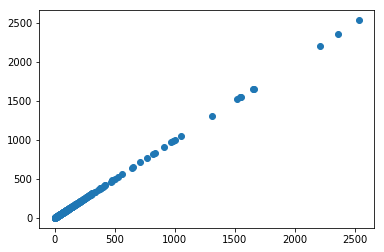

In [35]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

Looking at the distribution for number of mosquitoes with WNV, it's heavily right skewed, with its center close to zero. This is because most of the samples had observations with very low numbers of mosquitos.

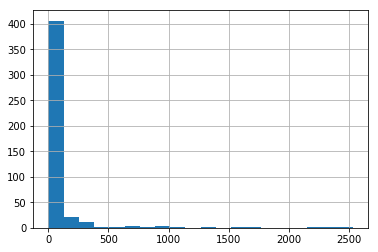

In [36]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

Looking at the distribution for number of mosquitoes without WNV. Like the graph above, it is also heavily right skewed.

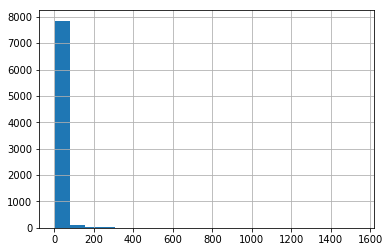

In [37]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)

### 4a. Merging the flat dataframe with train + weather dataframe

In [38]:
df2 = pd.merge(flat_groups, df[['Day_length','Tmax','Tmin', 'Tavg',
       'ResultSpeed','ResultDir', 'AvgSpeed','Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'Date2']].drop_duplicates(), how='left', left_index=True, right_index=True)

Setting the index for df2 for future merging

In [39]:
df2.index = df2['Date2']

Merging the dataframe I just made, df2 and my original dataframe's columns: Latitude, Longitude, and Trap.

In [40]:
df3 = pd.merge(df2, df[['Latitude', 'Longitude', 'Trap']].drop_duplicates(), how='left', on='Trap')

In [41]:
df3.head()

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date2,Latitude,Longitude
0,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
1,T002,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
2,T007,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.994991,-87.769279
3,T015,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812
4,T015,CULEX RESTUANS,4,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812


Creating a new variable `Month` to track only the months. Also dropping the `Date2` variable.

In [42]:
df3.Date2 = pd.to_datetime(df3.Date2)
df3['Month'] = df3.Date2.map(lambda x: x.month)
df3.drop(['Date2'], axis=1, inplace=True)

Saving results

In [43]:
# df3.to_csv('../data/final_dataframe.csv')

### Next notebook: `02_EDA`